# Movie Recommender System

## Dataset: [MovieLens 20m Dataset](https://grouplens.org/datasets/movielens/20m/)

### Import all the necessary header files as follows:

**pandas** : An open source library used for data manipulation, cleaning, analysis and visualization. <br/>
**numpy** : A library used to manipulate multi-dimensional data in the 	form of numpy arrays with useful in-built functions. <br/>
**graphlab** : A library created by Turi allowing the users to design applications by providing many algorithms. <br/>
**Ipython** : A library used to open external files of supported format to be embedded in the Jupyter Notebook.	<br/>
**matplotlib** : A library used for plotting and visualization of data. <br/>
**seaborn** : A library based on matplotlib which is used for plotting of data. <br/>
**re** : A library used to perform various operations regular expressions.

In [1]:
# Importing the header files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphlab
import re
from IPython.display import Image

### Read the data from the movielens dataset using the read_csv() function from the pandas library.

In [2]:
# Reading the dataset
ratings = pd.read_csv('ml-20m/ratings.csv')
movies = pd.read_csv('ml-20m/movies.csv')
links = pd.read_csv('ml-20m/links.csv')
scores = pd.read_csv('ml-20m/genome-scores.csv')
tags = pd.read_csv('ml-20m/tags.csv')
gnometags = pd.read_csv('ml-20m/genome-tags.csv')

### Inspecting and cleaning the data

In [3]:
ratings.columns

Index([u'userId', u'movieId', u'rating', u'timestamp'], dtype='object')

In [4]:
movies.columns

Index([u'movieId', u'title', u'genres'], dtype='object')

In [5]:
links.columns

Index([u'movieId', u'imdbId', u'tmdbId'], dtype='object')

In [6]:
scores.columns

Index([u'movieId', u'tagId', u'relevance'], dtype='object')

In [7]:
tags.columns

Index([u'userId', u'movieId', u'tag', u'timestamp'], dtype='object')

In [8]:
gnometags.columns

Index([u'tagId', u'tag'], dtype='object')

In [9]:
ratings = ratings.drop(['timestamp'], axis=1)
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
# Extracting the year of movie release
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [12]:
print "Number of missing values:", movies['year'].isna().sum()

Number of missing values: 17


In [13]:
movies = movies.dropna(how='any')

In [14]:
print "Number of missing values:", movies['year'].isna().sum()

Number of missing values: 0


In [15]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [17]:
tags = tags.drop(['timestamp'], axis=1)
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [18]:
gnometags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


### Data Visualization

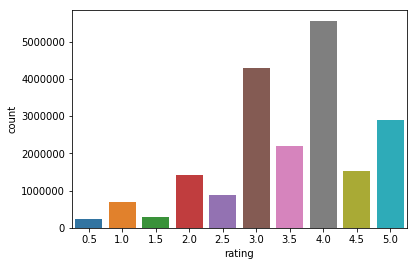

In [19]:
sns.countplot(x=ratings.rating, data=ratings)

rating    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

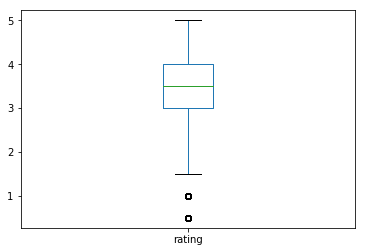

In [20]:
ratings['rating'].plot(kind='box', subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BB484E0>]],
      dtype=object)

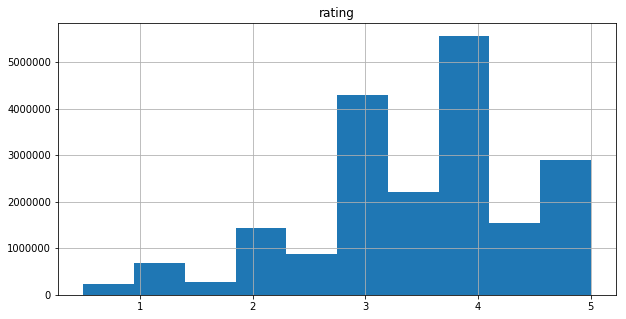

In [21]:
%matplotlib inline
ratings.hist(column='rating', figsize=(10,5))

In [22]:
# Combining the movies and ratings dataframe
combined = pd.merge(movies, ratings)
combined.head()

,movieId,title,genres,year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,11,4.5


In [23]:
combined = combined.drop(['genres'], axis=1)
print "Dimensions of dataframe:", combined.shape

Dimensions of dataframe: (20000177, 5)


#### Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [24]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(combined, test_size=0.25)

In [25]:
print "Dimensions of training set:", train.shape 
print "Dimensions of test set:", test.shape

Dimensions of training set: (15000132, 5)
Dimensions of test set: (5000045, 5)


In [26]:
train.dtypes

movieId      int64
title       object
year        object
userId       int64
rating     float64
dtype: object

In [27]:
train_data = graphlab.SFrame(train)
test_data = graphlab.SFrame(test)

This non-commercial license of GraphLab Create for academic use is assigned to shreayan_sameer@srmuniv.edu.in and will expire on February 07, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\shrea\AppData\Local\Temp\graphlab_server_1549562443.log.0


## Simple Popularity Model (recommendations based on popular choices)¶

##### Creating an object of the simple popularity model from the graphlab library on the training set. Simple popularity method is an algorithm that will make recommendations based on its popularity or ratings given to that object from various users. It is based completely upon the object ratings.

In [28]:
# Simple Popularity Model (recommendations based on popular choices)
pop_model = graphlab.popularity_recommender.create(train_data, user_id = 'userId', item_id = 'movieId', target = 'rating')

Recsys training: model = popularity

Warning: Ignoring columns title, year;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 15000132 observations with 138493 users and 25613 items.

Data prepared in: 14.3s

15000132 observations to process; with 25613 unique items.

In [29]:
# Getting recommendations for the first 5 users
pop_recommend = pop_model.recommend(users = range(1,6),k = 5)
pop_recommend.print_rows(num_rows = 25)

+--------+---------+-------+------+
| userId | movieId | score | rank |
+--------+---------+-------+------+
|   1    |  103871 |  5.0  |  1   |
|   1    |  130374 |  5.0  |  2   |
|   1    |  106113 |  5.0  |  3   |
|   1    |  126945 |  5.0  |  4   |
|   1    |  118338 |  5.0  |  5   |
|   2    |  103871 |  5.0  |  1   |
|   2    |  130374 |  5.0  |  2   |
|   2    |  106113 |  5.0  |  3   |
|   2    |  126945 |  5.0  |  4   |
|   2    |  118338 |  5.0  |  5   |
|   3    |  103871 |  5.0  |  1   |
|   3    |  130374 |  5.0  |  2   |
|   3    |  106113 |  5.0  |  3   |
|   3    |  126945 |  5.0  |  4   |
|   3    |  118338 |  5.0  |  5   |
|   4    |  103871 |  5.0  |  1   |
|   4    |  130374 |  5.0  |  2   |
|   4    |  106113 |  5.0  |  3   |
|   4    |  126945 |  5.0  |  4   |
|   4    |  118338 |  5.0  |  5   |
|   5    |  103871 |  5.0  |  1   |
|   5    |  130374 |  5.0  |  2   |
|   5    |  106113 |  5.0  |  3   |
|   5    |  126945 |  5.0  |  4   |
|   5    |  118338 |  5.0  |

## Collaborative Filtering Model (recommendations based on personalized choices)

#### Creating an object of the collaborative filtering model from the graphlab library on the training set. Collaborative filtering algorithm is a personalized algorithm which takes in account what movies users watch after a particular movie which is generally of the same genre. The collaborative filtering algorithm predicts what a user likes based on what other similar users like. It is one of the most popular recommender system algorithm.

In [30]:
# Collaborative Filtering Model
col_filter_model = graphlab.item_similarity_recommender.create(train_data, user_id  ='userId', item_id = 'movieId', target = 'rating', similarity_type = 'pearson')

Recsys training: model = item_similarity

Warning: Ignoring columns title, year;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 15000132 observations with 138493 users and 25613 items.

Data prepared in: 14.3528s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 12.929ms                       | 0.5        |

| 452.792ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.76s                               | 0                | 0               |

| 2.77s                               | 1                | 281             |

| 3.77s                               | 2                | 530             |

| 4.80s                               | 3                | 804             |

| 5.77s                               | 4.25             | 1101            |

| 6.76s                               | 5.25             | 1361            |

| 7.77s                               | 6.75             | 1752            |

| 8.76s                               | 7.75             | 2030            |

| 9.76s                               | 9                | 2329            |

| 10.76s                              | 10.25            | 2640            |

| 11.86s                              | 11.25            | 2911            |

| 12.77s                              | 12               | 3080            |

| 13.76s                              | 13.25            | 3434            |

| 14.80s                              | 14.25            | 3656            |

| 15.77s                              | 14.75            | 3821            |

| 16.76s                              | 16               | 4144            |

| 17.76s                              | 17.25            | 4442            |

| 18.77s                              | 18               | 4644            |

| 19.77s                              | 19               | 4913            |

| 20.77s                              | 20.25            | 5191            |

| 21.77s                              | 21.25            | 5504            |

| 22.76s                              | 22.75            | 5829            |

| 23.77s                              | 23.5             | 6041            |

| 24.77s                              | 24.25            | 6251            |

| 25.77s                              | 25               | 6467            |

| 26.77s                              | 26               | 6687            |

| 27.77s                              | 27               | 6962            |

| 28.77s                              | 27.75            | 7149            |

| 29.77s                              | 28.75            | 7404            |

| 30.78s                              | 29.5             | 7608            |

| 31.77s                              | 30.5             | 7832            |

| 32.77s                              | 31.5             | 8079            |

| 33.77s                              | 32.25            | 8315            |

| 34.79s                              | 33.25            | 8535            |

| 35.77s                              | 34.25            | 8807            |

| 36.79s                              | 35               | 9007            |

| 37.77s                              | 36               | 9253            |

| 38.77s                              | 37.25            | 9555            |

| 39.78s                              | 37.75            | 9729            |

| 40.78s                              | 38.75            | 9968            |

| 41.77s                              | 39.5             | 10165           |

| 42.78s                              | 40.25            | 10341           |

| 43.80s                              | 41               | 10514           |

| 44.77s                              | 41.5             | 10635           |

| 45.77s                              | 42.25            | 10867           |

| 46.77s                              | 43.25            | 11081           |

| 47.78s                              | 44               | 11319           |

| 48.80s                              | 45               | 11531           |

| 49.78s                              | 45.5             | 11684           |

| 50.78s                              | 46.25            | 11851           |

| 51.78s                              | 46.75            | 11975           |

| 52.77s                              | 47.25            | 12156           |

| 53.77s                              | 48               | 12330           |

| 54.79s                              | 48.75            | 12502           |

| 55.77s                              | 49.5             | 12686           |

| 56.80s                              | 50.25            | 12890           |

| 57.78s                              | 51               | 13097           |

| 58.77s                              | 51.75            | 13315           |

| 59.77s                              | 52.75            | 13527           |

| 1m 0s                               | 53.5             | 13755           |

| 1m 1s                               | 54.5             | 13978           |

| 1m 2s                               | 55.25            | 14190           |

| 1m 3s                               | 56               | 14390           |

| 1m 4s                               | 57               | 14622           |

| 1m 5s                               | 57.5             | 14728           |

| 1m 6s                               | 57.75            | 14836           |

| 1m 7s                               | 58.25            | 14974           |

| 1m 8s                               | 59               | 15117           |

| 1m 9s                               | 59.5             | 15252           |

| 1m 10s                              | 60.25            | 15467           |

| 1m 11s                              | 61               | 15673           |

| 1m 12s                              | 61.75            | 15836           |

| 1m 13s                              | 62.5             | 16049           |

| 1m 14s                              | 63.25            | 16233           |

| 1m 15s                              | 64               | 16407           |

| 1m 16s                              | 64.75            | 16612           |

| 1m 17s                              | 65.5             | 16797           |

| 1m 18s                              | 66.25            | 16984           |

| 1m 19s                              | 67               | 17215           |

| 1m 20s                              | 68               | 17473           |

| 1m 21s                              | 69               | 17705           |

| 1m 22s                              | 70               | 17975           |

| 1m 23s                              | 71               | 18207           |

| 1m 24s                              | 71.75            | 18431           |

| 1m 25s                              | 72.75            | 18686           |

| 1m 26s                              | 73.75            | 18923           |

| 1m 27s                              | 74.5             | 19142           |

| 1m 28s                              | 75.5             | 19345           |

| 1m 29s                              | 76               | 19520           |

| 1m 30s                              | 76.75            | 19716           |

| 1m 31s                              | 77.75            | 19927           |

| 1m 32s                              | 78.75            | 20185           |

| 1m 33s                              | 79.75            | 20456           |

| 1m 34s                              | 80.75            | 20696           |

| 1m 35s                              | 81.5             | 20931           |

| 1m 36s                              | 82.5             | 21173           |

| 1m 37s                              | 83.75            | 21452           |

| 1m 38s                              | 84.75            | 21729           |

| 1m 39s                              | 85.5             | 21957           |

| 1m 40s                              | 86.5             | 22209           |

| 1m 41s                              | 87.5             | 22470           |

| 1m 42s                              | 88.75            | 22736           |

| 1m 43s                              | 89.75            | 23009           |

| 1m 44s                              | 90.75            | 23248           |

| 1m 45s                              | 91.75            | 23501           |

| 1m 46s                              | 92.75            | 23763           |

| 1m 47s                              | 93.75            | 24022           |

| 1m 48s                              | 94.75            | 24294           |

| 1m 49s                              | 95.75            | 24530           |

| 1m 50s                              | 96.75            | 24786           |

| 1m 51s                              | 97.5             | 25029           |

| 1m 52s                              | 98.5             | 25277           |

| 1m 53s                              | 99.5             | 25521           |

| 2m 1s                               | 100              | 25613           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 123.707s

In [31]:
# Making recommendations for the first 5 users
col_filter_recommend = col_filter_model.recommend(users = range(1,6), k = 5)
col_filter_recommend.print_rows(num_rows = 25)

+--------+---------+-------+------+
| userId | movieId | score | rank |
+--------+---------+-------+------+
|   1    |  103871 |  5.0  |  1   |
|   1    |  130374 |  5.0  |  2   |
|   1    |  106113 |  5.0  |  3   |
|   1    |  126945 |  5.0  |  4   |
|   1    |  118338 |  5.0  |  5   |
|   2    |  103871 |  5.0  |  1   |
|   2    |  130374 |  5.0  |  2   |
|   2    |  106113 |  5.0  |  3   |
|   2    |  126945 |  5.0  |  4   |
|   2    |  118338 |  5.0  |  5   |
|   3    |  103871 |  5.0  |  1   |
|   3    |  130374 |  5.0  |  2   |
|   3    |  106113 |  5.0  |  3   |
|   3    |  126945 |  5.0  |  4   |
|   3    |  118338 |  5.0  |  5   |
|   4    |  103871 |  5.0  |  1   |
|   4    |  130374 |  5.0  |  2   |
|   4    |  106113 |  5.0  |  3   |
|   4    |  126945 |  5.0  |  4   |
|   4    |  118338 |  5.0  |  5   |
|   5    |  103871 |  5.0  |  1   |
|   5    |  130374 |  5.0  |  2   |
|   5    |  106113 |  5.0  |  3   |
|   5    |  126945 |  5.0  |  4   |
|   5    |  118338 |  5.0  |

## Pivot table based correlation model

In [32]:
train_data.head()

movieId,title,year,userId,rating
36517,"Constant Gardener, The(2005) ...",2005,74586,3.0
450,With Honors (1994),1994,15601,2.0
1201,"Good, the Bad and theUgly, The (Buono, il ...",1966,39142,4.0
1375,Star Trek III: The Searchfor Spock (1984) ...,1984,46761,1.5
435,Coneheads (1993),1993,102453,3.0
1517,Austin Powers:International Man of ...,1997,118443,5.0
434,Cliffhanger (1993),1993,136028,3.0
2174,Beetlejuice (1988),1988,44577,4.0
1690,Alien: Resurrection(1997) ...,1997,84386,2.5
2455,"Fly, The (1986)",1986,124324,2.0


In [33]:
test_data.head()

movieId,title,year,userId,rating
1248,Touch of Evil (1958),1958,98350,3.5
50,"Usual Suspects, The(1995) ...",1995,37638,4.5
2165,Your Friends andNeighbors (1998) ...,1998,108947,3.0
2504,200 Cigarettes (1999),1999,68575,1.0
1188,Strictly Ballroom (1992),1992,43419,4.0
349,Clear and Present Danger(1994) ...,1994,74299,4.0
2712,Eyes Wide Shut (1999),1999,73557,3.0
2250,Men Don't Leave (1990),1990,22092,5.0
2034,"Black Hole, The (1979)",1979,92957,4.0
1396,Sneakers (1992),1992,1843,4.0


In [34]:
# Splitting combined data else it would cause int 32 bit overflow
X_train = combined.iloc[:1000000,:]
X_test = combined.iloc[1000000:,:]

In [35]:
# Making a pivot table
pivot = X_train.pivot_table(index = ["userId"],columns = ["title"],values = "rating")

In [36]:
pivot.head()

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
movie_name = raw_input()

Angels and Insects (1995)


In [38]:
# Find correlation between the input movie and other movies
print("Movies similar to the given movies are:")
movie_watched = pivot[movie_name]
similarity = pivot.corrwith(movie_watched)  
similarity = similarity.sort_values(ascending=False)
similarity.head()

Movies similar to the given movies are:


title
Angels and Insects (1995)                          1.000000
Shopping (1994)                                    0.699419
Shadows (Cienie) (1988)                            0.534949
Cry, the Beloved Country (1995)                    0.495841
Once Upon a Time... When We Were Colored (1995)    0.484011
dtype: float64

In [39]:
# Generalizing correlation in a function
def recommend(movie_name):
    print("Movies similar to the given movies are:")
    movie_watched = pivot[movie_name]
    similarity = pivot.corrwith(movie_watched)  
    similarity = similarity.sort_values(ascending=False)
    print similarity.head()

In [40]:
movie_name = raw_input()

Across the Sea of Time (1995)


In [41]:
recommend(movie_name)

Movies similar to the given movies are:


F:\Installed\Anaconda3\envs\py27\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
F:\Installed\Anaconda3\envs\py27\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Sonic Outlaws (1995)                   1.000000
Across the Sea of Time (1995)          1.000000
Pie in the Sky (1996)                  1.000000
Headless Body in Topless Bar (1995)    1.000000
Steal Big, Steal Little (1995)         0.944911
dtype: float64


### Evaluation of Models

In [42]:
# Calculating Accuracy of Predictions
model_performance = graphlab.compare(test_data, [pop_model, col_filter_model])
graphlab.show_comparison(model_performance,[pop_model, col_filter_model])

PROGRESS: Evaluate model M0


recommendations finished on 1000/138452 queries. users per second: 4554.87

recommendations finished on 2000/138452 queries. users per second: 4091.75

recommendations finished on 3000/138452 queries. users per second: 4083.53

recommendations finished on 4000/138452 queries. users per second: 4168.16

recommendations finished on 5000/138452 queries. users per second: 4167.76

recommendations finished on 6000/138452 queries. users per second: 4173.3

recommendations finished on 7000/138452 queries. users per second: 4182.23

recommendations finished on 8000/138452 queries. users per second: 4202.2

recommendations finished on 9000/138452 queries. users per second: 4214.05

recommendations finished on 10000/138452 queries. users per second: 4225.27

recommendations finished on 11000/138452 queries. users per second: 4241.02

recommendations finished on 12000/138452 queries. users per second: 4073.72

recommendations finished on 13000/138452 queries. users per second: 4038.91

recommendations finished on 14000/138452 queries. users per second: 4053.65

recommendations finished on 15000/138452 queries. users per second: 4069.86

recommendations finished on 16000/138452 queries. users per second: 4085.12

recommendations finished on 17000/138452 queries. users per second: 4075.13

recommendations finished on 18000/138452 queries. users per second: 4055.31

recommendations finished on 19000/138452 queries. users per second: 4052.32

recommendations finished on 20000/138452 queries. users per second: 4069.46

recommendations finished on 21000/138452 queries. users per second: 4082.71

recommendations finished on 22000/138452 queries. users per second: 4081.03

recommendations finished on 23000/138452 queries. users per second: 4085.48

recommendations finished on 24000/138452 queries. users per second: 4086.01

recommendations finished on 25000/138452 queries. users per second: 4085.86

recommendations finished on 26000/138452 queries. users per second: 4042.47

recommendations finished on 27000/138452 queries. users per second: 3999.34

recommendations finished on 28000/138452 queries. users per second: 3955.94

recommendations finished on 29000/138452 queries. users per second: 3956.97

recommendations finished on 30000/138452 queries. users per second: 3952.65

recommendations finished on 31000/138452 queries. users per second: 3964.29

recommendations finished on 32000/138452 queries. users per second: 3975.24

recommendations finished on 33000/138452 queries. users per second: 3987.05

recommendations finished on 34000/138452 queries. users per second: 3986.05

recommendations finished on 35000/138452 queries. users per second: 3963.43

recommendations finished on 36000/138452 queries. users per second: 3972.32

recommendations finished on 37000/138452 queries. users per second: 3959.91

recommendations finished on 38000/138452 queries. users per second: 3959.3

recommendations finished on 39000/138452 queries. users per second: 3939.94

recommendations finished on 40000/138452 queries. users per second: 3949.19

recommendations finished on 41000/138452 queries. users per second: 3917.21

recommendations finished on 42000/138452 queries. users per second: 3921.7

recommendations finished on 43000/138452 queries. users per second: 3910.99

recommendations finished on 44000/138452 queries. users per second: 3893.58

recommendations finished on 45000/138452 queries. users per second: 3870.4

recommendations finished on 46000/138452 queries. users per second: 3855.3

recommendations finished on 47000/138452 queries. users per second: 3865.57

recommendations finished on 48000/138452 queries. users per second: 3872.94

recommendations finished on 49000/138452 queries. users per second: 3877.91

recommendations finished on 50000/138452 queries. users per second: 3877.57

recommendations finished on 51000/138452 queries. users per second: 3882.56

recommendations finished on 52000/138452 queries. users per second: 3889.4

recommendations finished on 53000/138452 queries. users per second: 3894.58

recommendations finished on 54000/138452 queries. users per second: 3900.13

recommendations finished on 55000/138452 queries. users per second: 3896.62

recommendations finished on 56000/138452 queries. users per second: 3894.37

recommendations finished on 57000/138452 queries. users per second: 3893.52

recommendations finished on 58000/138452 queries. users per second: 3900.29

recommendations finished on 59000/138452 queries. users per second: 3909.3

recommendations finished on 60000/138452 queries. users per second: 3915.5

recommendations finished on 61000/138452 queries. users per second: 3923.15

recommendations finished on 62000/138452 queries. users per second: 3927.84

recommendations finished on 63000/138452 queries. users per second: 3934.49

recommendations finished on 64000/138452 queries. users per second: 3940.35

recommendations finished on 65000/138452 queries. users per second: 3946.04

recommendations finished on 66000/138452 queries. users per second: 3950.98

recommendations finished on 67000/138452 queries. users per second: 3957.77

recommendations finished on 68000/138452 queries. users per second: 3964.15

recommendations finished on 69000/138452 queries. users per second: 3966.49

recommendations finished on 70000/138452 queries. users per second: 3971.92

recommendations finished on 71000/138452 queries. users per second: 3976.32

recommendations finished on 72000/138452 queries. users per second: 3982.81

recommendations finished on 73000/138452 queries. users per second: 3988.26

recommendations finished on 74000/138452 queries. users per second: 3992.09

recommendations finished on 75000/138452 queries. users per second: 3996.65

recommendations finished on 76000/138452 queries. users per second: 4002.17

recommendations finished on 77000/138452 queries. users per second: 3998.61

recommendations finished on 78000/138452 queries. users per second: 3994.94

recommendations finished on 79000/138452 queries. users per second: 3997.53

recommendations finished on 80000/138452 queries. users per second: 4001.06

recommendations finished on 81000/138452 queries. users per second: 4005.61

recommendations finished on 82000/138452 queries. users per second: 4010.43

recommendations finished on 83000/138452 queries. users per second: 4013.22

recommendations finished on 84000/138452 queries. users per second: 4016.52

recommendations finished on 85000/138452 queries. users per second: 4019.73

recommendations finished on 86000/138452 queries. users per second: 4024.21

recommendations finished on 87000/138452 queries. users per second: 4027.46

recommendations finished on 88000/138452 queries. users per second: 4030.66

recommendations finished on 89000/138452 queries. users per second: 4034.34

recommendations finished on 90000/138452 queries. users per second: 4036.21

recommendations finished on 91000/138452 queries. users per second: 4037.68

recommendations finished on 92000/138452 queries. users per second: 4039.4

recommendations finished on 93000/138452 queries. users per second: 4042.25

recommendations finished on 94000/138452 queries. users per second: 4045.67

recommendations finished on 95000/138452 queries. users per second: 4047.43

recommendations finished on 96000/138452 queries. users per second: 4050.85

recommendations finished on 97000/138452 queries. users per second: 4053.37

recommendations finished on 98000/138452 queries. users per second: 4051.48

recommendations finished on 99000/138452 queries. users per second: 4049.46

recommendations finished on 100000/138452 queries. users per second: 4050.77

recommendations finished on 101000/138452 queries. users per second: 4053.83

recommendations finished on 102000/138452 queries. users per second: 4057.66

recommendations finished on 103000/138452 queries. users per second: 4060.45

recommendations finished on 104000/138452 queries. users per second: 4063.82

recommendations finished on 105000/138452 queries. users per second: 4066.51

recommendations finished on 106000/138452 queries. users per second: 4069.15

recommendations finished on 107000/138452 queries. users per second: 4072.06

recommendations finished on 108000/138452 queries. users per second: 4071.69

recommendations finished on 109000/138452 queries. users per second: 4073.76

recommendations finished on 110000/138452 queries. users per second: 4076.25

recommendations finished on 111000/138452 queries. users per second: 4078.84

recommendations finished on 112000/138452 queries. users per second: 4081.4

recommendations finished on 113000/138452 queries. users per second: 4083.76

recommendations finished on 114000/138452 queries. users per second: 4083.01

recommendations finished on 115000/138452 queries. users per second: 4085.75

recommendations finished on 116000/138452 queries. users per second: 4088.44

recommendations finished on 117000/138452 queries. users per second: 4089.81

recommendations finished on 118000/138452 queries. users per second: 4091.87

recommendations finished on 119000/138452 queries. users per second: 4091.92

recommendations finished on 120000/138452 queries. users per second: 4088.35

recommendations finished on 121000/138452 queries. users per second: 4087.75

recommendations finished on 122000/138452 queries. users per second: 4090.03

recommendations finished on 123000/138452 queries. users per second: 4092.13

recommendations finished on 124000/138452 queries. users per second: 4094.21

recommendations finished on 125000/138452 queries. users per second: 4094.78

recommendations finished on 126000/138452 queries. users per second: 4096.41

recommendations finished on 127000/138452 queries. users per second: 4097.22

recommendations finished on 128000/138452 queries. users per second: 4098.41

recommendations finished on 129000/138452 queries. users per second: 4100.1

recommendations finished on 130000/138452 queries. users per second: 4101.9

recommendations finished on 131000/138452 queries. users per second: 4103.28

recommendations finished on 132000/138452 queries. users per second: 4105.03

recommendations finished on 133000/138452 queries. users per second: 4107.01

recommendations finished on 134000/138452 queries. users per second: 4108.97

recommendations finished on 135000/138452 queries. users per second: 4109.13

recommendations finished on 136000/138452 queries. users per second: 4106.33

recommendations finished on 137000/138452 queries. users per second: 4099.76

recommendations finished on 138000/138452 queries. users per second: 4093.42


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    |        0.0        |        0.0        |
|   3    |        0.0        |        0.0        |
|   4    |        0.0        |        0.0        |
|   5    |        0.0        |        0.0        |
|   6    |        0.0        |        0.0        |
|   7    | 2.06363422496e-06 | 6.31319211044e-08 |
|   8    | 1.80567994684e-06 | 6.31319211044e-08 |
|   9    | 2.40757326245e-06 | 7.01716090063e-08 |
|   10   | 2.88908791495e-06 | 3.03162569889e-07 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/138452 queries. users per second: 3089.77

recommendations finished on 2000/138452 queries. users per second: 2935.96

recommendations finished on 3000/138452 queries. users per second: 2829.67

recommendations finished on 4000/138452 queries. users per second: 2774.52

recommendations finished on 5000/138452 queries. users per second: 2741.74

recommendations finished on 6000/138452 queries. users per second: 2701.67

recommendations finished on 7000/138452 queries. users per second: 2676.99

recommendations finished on 8000/138452 queries. users per second: 2586.84

recommendations finished on 9000/138452 queries. users per second: 2559.42

recommendations finished on 10000/138452 queries. users per second: 2534

recommendations finished on 11000/138452 queries. users per second: 2517.09

recommendations finished on 12000/138452 queries. users per second: 2500.05

recommendations finished on 13000/138452 queries. users per second: 2493.87

recommendations finished on 14000/138452 queries. users per second: 2490.3

recommendations finished on 15000/138452 queries. users per second: 2493.43

recommendations finished on 16000/138452 queries. users per second: 2498.13

recommendations finished on 17000/138452 queries. users per second: 2509.66

recommendations finished on 18000/138452 queries. users per second: 2514.7

recommendations finished on 19000/138452 queries. users per second: 2516.91

recommendations finished on 20000/138452 queries. users per second: 2498.45

recommendations finished on 21000/138452 queries. users per second: 2491.84

recommendations finished on 22000/138452 queries. users per second: 2492.92

recommendations finished on 23000/138452 queries. users per second: 2482.19

recommendations finished on 24000/138452 queries. users per second: 2483.95

recommendations finished on 25000/138452 queries. users per second: 2485.57

recommendations finished on 26000/138452 queries. users per second: 2489.47

recommendations finished on 27000/138452 queries. users per second: 2498.26

recommendations finished on 28000/138452 queries. users per second: 2504.91

recommendations finished on 29000/138452 queries. users per second: 2512.56

recommendations finished on 30000/138452 queries. users per second: 2518.89

recommendations finished on 31000/138452 queries. users per second: 2526.08

recommendations finished on 32000/138452 queries. users per second: 2530.04

recommendations finished on 33000/138452 queries. users per second: 2521.57

recommendations finished on 34000/138452 queries. users per second: 2521.32

recommendations finished on 35000/138452 queries. users per second: 2523.25

recommendations finished on 36000/138452 queries. users per second: 2522.78

recommendations finished on 37000/138452 queries. users per second: 2525.43

recommendations finished on 38000/138452 queries. users per second: 2526.6

recommendations finished on 39000/138452 queries. users per second: 2528.36

recommendations finished on 40000/138452 queries. users per second: 2531.65

recommendations finished on 41000/138452 queries. users per second: 2531.65

recommendations finished on 42000/138452 queries. users per second: 2533.48

recommendations finished on 43000/138452 queries. users per second: 2533.14

recommendations finished on 44000/138452 queries. users per second: 2532.81

recommendations finished on 45000/138452 queries. users per second: 2529.87

recommendations finished on 46000/138452 queries. users per second: 2516.55

recommendations finished on 47000/138452 queries. users per second: 2517.54

recommendations finished on 48000/138452 queries. users per second: 2517.84

recommendations finished on 49000/138452 queries. users per second: 2517.34

recommendations finished on 50000/138452 queries. users per second: 2517.62

recommendations finished on 51000/138452 queries. users per second: 2518.52

recommendations finished on 52000/138452 queries. users per second: 2519.26

recommendations finished on 53000/138452 queries. users per second: 2519.49

recommendations finished on 54000/138452 queries. users per second: 2518.07

recommendations finished on 55000/138452 queries. users per second: 2518.61

recommendations finished on 56000/138452 queries. users per second: 2519.92

recommendations finished on 57000/138452 queries. users per second: 2521.68

recommendations finished on 58000/138452 queries. users per second: 2518.45

recommendations finished on 59000/138452 queries. users per second: 2519.76

recommendations finished on 60000/138452 queries. users per second: 2523.02

recommendations finished on 61000/138452 queries. users per second: 2526.72

recommendations finished on 62000/138452 queries. users per second: 2521.35

recommendations finished on 63000/138452 queries. users per second: 2511.06

recommendations finished on 64000/138452 queries. users per second: 2504.1

recommendations finished on 65000/138452 queries. users per second: 2498.25

recommendations finished on 66000/138452 queries. users per second: 2489.63

recommendations finished on 67000/138452 queries. users per second: 2488.58

recommendations finished on 68000/138452 queries. users per second: 2489.11

recommendations finished on 69000/138452 queries. users per second: 2487.39

recommendations finished on 70000/138452 queries. users per second: 2477.53

recommendations finished on 71000/138452 queries. users per second: 2477.18

recommendations finished on 72000/138452 queries. users per second: 2472.75

recommendations finished on 73000/138452 queries. users per second: 2468.86

recommendations finished on 74000/138452 queries. users per second: 2462.92

recommendations finished on 75000/138452 queries. users per second: 2460.4

recommendations finished on 76000/138452 queries. users per second: 2457.24

recommendations finished on 77000/138452 queries. users per second: 2455.83

recommendations finished on 78000/138452 queries. users per second: 2456.7

recommendations finished on 79000/138452 queries. users per second: 2453.81

recommendations finished on 80000/138452 queries. users per second: 2455.14

recommendations finished on 81000/138452 queries. users per second: 2446.94

recommendations finished on 82000/138452 queries. users per second: 2449.41

recommendations finished on 83000/138452 queries. users per second: 2450.6

recommendations finished on 84000/138452 queries. users per second: 2452.77

recommendations finished on 85000/138452 queries. users per second: 2454.39

recommendations finished on 86000/138452 queries. users per second: 2451.99

recommendations finished on 87000/138452 queries. users per second: 2447.73

recommendations finished on 88000/138452 queries. users per second: 2444.73

recommendations finished on 89000/138452 queries. users per second: 2441.86

recommendations finished on 90000/138452 queries. users per second: 2437.27

recommendations finished on 91000/138452 queries. users per second: 2435.7

recommendations finished on 92000/138452 queries. users per second: 2429.19

recommendations finished on 93000/138452 queries. users per second: 2420.88

recommendations finished on 94000/138452 queries. users per second: 2420.01

recommendations finished on 95000/138452 queries. users per second: 2415.71

recommendations finished on 96000/138452 queries. users per second: 2411.97

recommendations finished on 97000/138452 queries. users per second: 2406.89

recommendations finished on 98000/138452 queries. users per second: 2402.89

recommendations finished on 99000/138452 queries. users per second: 2400.27

recommendations finished on 100000/138452 queries. users per second: 2397.83

recommendations finished on 101000/138452 queries. users per second: 2399.71

recommendations finished on 102000/138452 queries. users per second: 2402.35

recommendations finished on 103000/138452 queries. users per second: 2402.48

recommendations finished on 104000/138452 queries. users per second: 2402.11

recommendations finished on 105000/138452 queries. users per second: 2403.67

recommendations finished on 106000/138452 queries. users per second: 2404.66

recommendations finished on 107000/138452 queries. users per second: 2402.12

recommendations finished on 108000/138452 queries. users per second: 2399.16

recommendations finished on 109000/138452 queries. users per second: 2397.21

recommendations finished on 110000/138452 queries. users per second: 2399.74

recommendations finished on 111000/138452 queries. users per second: 2402.44

recommendations finished on 112000/138452 queries. users per second: 2405.76

recommendations finished on 113000/138452 queries. users per second: 2408.52

recommendations finished on 114000/138452 queries. users per second: 2411.08

recommendations finished on 115000/138452 queries. users per second: 2413.14

recommendations finished on 116000/138452 queries. users per second: 2412.06

recommendations finished on 117000/138452 queries. users per second: 2413.08

recommendations finished on 118000/138452 queries. users per second: 2411.25

recommendations finished on 119000/138452 queries. users per second: 2408.72

recommendations finished on 120000/138452 queries. users per second: 2406.45

recommendations finished on 121000/138452 queries. users per second: 2406.86

recommendations finished on 122000/138452 queries. users per second: 2408.07

recommendations finished on 123000/138452 queries. users per second: 2409.05

recommendations finished on 124000/138452 queries. users per second: 2405.25

recommendations finished on 125000/138452 queries. users per second: 2402.05

recommendations finished on 126000/138452 queries. users per second: 2399.27

recommendations finished on 127000/138452 queries. users per second: 2398.58

recommendations finished on 128000/138452 queries. users per second: 2398.85

recommendations finished on 129000/138452 queries. users per second: 2401.12

recommendations finished on 130000/138452 queries. users per second: 2399.37

recommendations finished on 131000/138452 queries. users per second: 2397.73

recommendations finished on 132000/138452 queries. users per second: 2396.12

recommendations finished on 133000/138452 queries. users per second: 2394.2

recommendations finished on 134000/138452 queries. users per second: 2392.65

recommendations finished on 135000/138452 queries. users per second: 2391.54

recommendations finished on 136000/138452 queries. users per second: 2390.66

recommendations finished on 137000/138452 queries. users per second: 2389.18

recommendations finished on 138000/138452 queries. users per second: 2385.14


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    |        0.0        |        0.0        |
|   3    |        0.0        |        0.0        |
|   4    |        0.0        |        0.0        |
|   5    |        0.0        |        0.0        |
|   6    |        0.0        |        0.0        |
|   7    |        0.0        |        0.0        |
|   8    |        0.0        |        0.0        |
|   9    |        0.0        |        0.0        |
|   10   | 7.22271978736e-07 | 4.94706834751e-08 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

Model compare metric: precision_recall
Canvas is accessible via web browser at the URL: http://localhost:60930/index.html
Opening Canvas in default web browser.


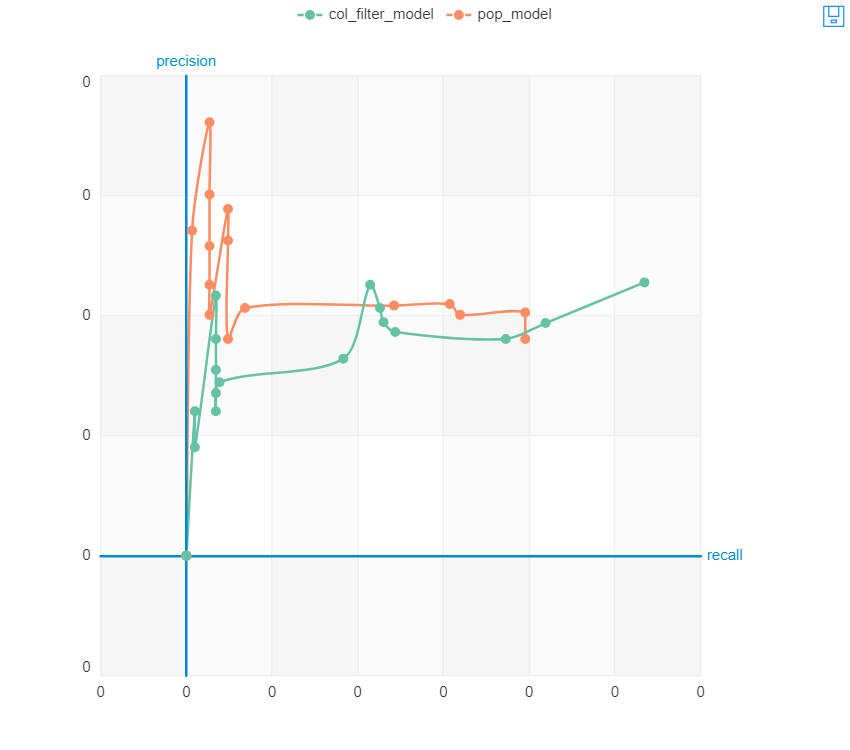

In [43]:
Image("comparison.png")